In [206]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [245]:
BTC = yf.download('BTC-USD', start = '2022-1-04', end = '2022-10-04')['Adj Close']
ETH = yf.download('ETH-USD', start = '2022-1-04', end = '2022-10-04')['Adj Close']
BNB = yf.download('BNB-USD', start = '2022-1-04', end = '2022-10-04')['Adj Close']
USDT = yf.download('USDT-USD', start = '2022-1-04', end = '2022-10-04')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [246]:
print(BTC, ETH, BNB, USDT)

Date
2022-01-04    45897.574219
2022-01-05    43569.003906
2022-01-06    43160.929688
2022-01-07    41557.902344
2022-01-08    41733.941406
                  ...     
2022-09-29    19573.050781
2022-09-30    19431.789062
2022-10-01    19312.095703
2022-10-02    19044.107422
2022-10-03    19623.580078
Name: Adj Close, Length: 273, dtype: float64 Date
2022-01-04    3794.056641
2022-01-05    3550.386963
2022-01-06    3418.408203
2022-01-07    3193.210449
2022-01-08    3091.972656
                 ...     
2022-09-29    1335.652344
2022-09-30    1327.978638
2022-10-01    1311.644409
2022-10-02    1276.093506
2022-10-03    1323.439209
Name: Adj Close, Length: 273, dtype: float64 Date
2022-01-04    507.506104
2022-01-05    475.056946
2022-01-06    473.275604
2022-01-07    447.788483
2022-01-08    430.246155
                 ...    
2022-09-29    283.789032
2022-09-30    284.192291
2022-10-01    282.871918
2022-10-02    284.433105
2022-10-03    287.031982
Name: Adj Close, Length: 273, dtype: 

In [247]:
stocks = pd.concat([BTC, ETH, BNB, USDT], axis=1)
stocks.columns = ['BTC', 'ETH', 'BNB', 'USDT'] 
stocks

,BTC,ETH,BNB,USDT
Date,,,,
2022-01-04,45897.574219,3794.056641,507.506104,1.000208
2022-01-05,43569.003906,3550.386963,475.056946,1.000122
2022-01-06,43160.929688,3418.408203,473.275604,1.000195
2022-01-07,41557.902344,3193.210449,447.788483,1.000252
2022-01-08,41733.941406,3091.972656,430.246155,1.000097
...,...,...,...,...
2022-09-29,19573.050781,1335.652344,283.789032,1.000079
2022-09-30,19431.789062,1327.978638,284.192291,1.000049
2022-10-01,19312.095703,1311.644409,282.871918,1.000043


In [248]:
#RETURNS

returns = stocks.shift(1)/stocks
returns

,BTC,ETH,BNB,USDT
Date,,,,
2022-01-04,NaN,NaN,NaN,NaN
2022-01-05,1.053446,1.068632,1.068306,1.000086
2022-01-06,1.009455,1.038608,1.003764,0.999927
2022-01-07,1.038573,1.070524,1.056918,0.999943
2022-01-08,0.995782,1.032742,1.040773,1.000155
...,...,...,...,...
2022-09-29,0.992524,1.001317,0.992925,0.999897
2022-09-30,1.007270,1.005778,0.998581,1.000030
2022-10-01,1.006198,1.012453,1.004668,1.000006


In [249]:
#LOGARITMIC RETURNS

logReturns = np.log(returns)*250
logReturns

,BTC,ETH,BNB,USDT
Date,,,,
2022-01-04,NaN,NaN,NaN,NaN
2022-01-05,13.016572,16.594800,16.518514,0.021514
2022-01-06,2.352574,9.470399,0.939198,-0.018266
2022-01-07,9.461997,17.037046,13.839227,-0.014242
2022-01-08,-1.056762,8.054383,9.990872,0.038736
...,...,...,...,...
2022-09-29,-1.876046,0.328938,-1.775041,-0.025763
2022-09-30,1.810831,1.440464,-0.354993,0.007510
2022-10-01,1.544679,3.094085,1.164221,0.001490


In [251]:
weight = np.zeros((a, 4))
expectedReturn = np.zeros(a)
expectedVolatility = np.zeros(a)
sharpeRatio = np.zeros(a)

meanlogReturns = logReturns.mean()
Sigma = logReturns.cov()
for k in range(a):
    w = np.array(np.random.random(4))
    w = w / np.sum(w)
    weight[k,:] = w
    
    expectedReturn[k] = np.sum(meanlogReturns * w)
    expectedVolatility[k] = np.sqrt(np.dot(w.T, np.dot(Sigma,w)))
    
    sharpeRatio[k] = expectedReturn[k] / expectedVolatility[k]

In [252]:
print(w)

[0.34708398 0.30430197 0.26515714 0.08345691]


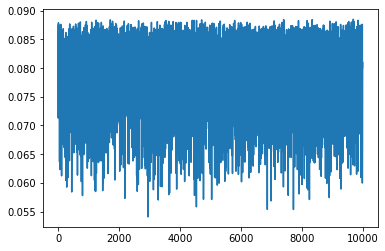

In [253]:
plt.plot(sharpeRatio)

In [254]:
maxIndex = sharpeRatio.argmax()
weight[maxIndex,:]

array([6.77557273e-01, 9.85007739e-02, 3.23487564e-05, 2.23909605e-01])

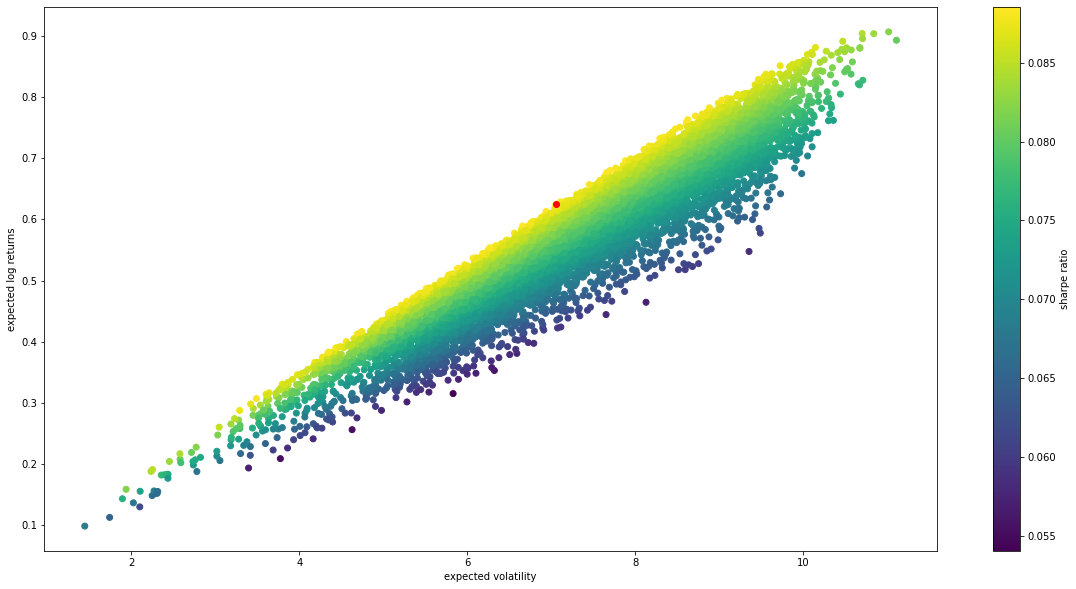

In [255]:
plt.figure(figsize=(20,10))
plt.scatter(expectedVolatility,expectedReturn,c=sharpeRatio)
plt.xlabel('expected volatility')
plt.ylabel('expected log returns')
plt.colorbar(label='sharpe ratio')
plt.scatter(expectedVolatility[maxIndex],expectedReturn[maxIndex],c='red')
plt.show()

In [256]:
def negativeSR(w):
    w = np.array(w)
    R = np.sum(meanlogReturns*w)
    V = np.sqrt(np.dot(w.T, np.dot(Sigma,w)))
    SR = R/V
    return -1*SR

def b(w):
    return np.sum(w)-1

w0 = [0.25, 0.25, 0.25, 0.25] 
bounds = ((0,1), (0,1), (0,1), (0,1))
constraints = ({'type': 'eq', 'fun': b})
w_opt = minimize(negativeSR, w0, method='SLSQP', bounds=bounds, constraints=constraints)
w_opt

     fun: -0.08853277803119254
     jac: array([-7.40783289e-05, -5.86947426e-05,  3.05911005e-02,  2.25744210e-04])
 message: 'Optimization terminated successfully'
    nfev: 45
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([6.33592101e-01, 1.25790663e-01, 5.37764278e-17, 2.40617236e-01])

In [257]:
print(w)

[0.34708398 0.30430197 0.26515714 0.08345691]


In [258]:
w_opt.x

array([6.33592101e-01, 1.25790663e-01, 5.37764278e-17, 2.40617236e-01])

In [259]:
returns = np.linspace(0, 1.50, num= 50, endpoint=True, retstep=False, dtype=None, axis=0)
volatility_opt = []

def GR(w):
    w = np.array(w)
    R = np.sum(meanlogReturns*w)
    return R

def minimizeMyvolatility(w):
    w =np.array(w)
    V = np.sqrt(np.dot(w.T, np.dot(Sigma, w)))
    return V

for R in returns:
    constraints = ({'type': 'eq', 'fun': b},
                   {'type': 'eq', 'fun': lambda w: GR(w) - R})
    opt = minimize(minimizeMyvolatility, w0, method = 'SLSQP', bounds = bounds, constraints = constraints)

    volatility_opt.append(opt['fun'])

In [260]:
volatility_opt

[0.07358186022954628,
 0.3688593619174844,
 0.710416973482286,
 1.054159476369915,
 1.3984764692032081,
 1.7430277039123896,
 2.0876971651484397,
 2.4324346166486572,
 2.7772147027805176,
 3.1220233071694223,
 3.46685192388933,
 3.8116951202691256,
 4.156549266648857,
 4.501411849252432,
 4.846281069518592,
 5.19115560103072,
 5.536034450673475,
 5.880916863653746,
 6.225802237746127,
 6.570690118100565,
 6.915580120122925,
 7.2604719349459925,
 7.605365332106938,
 7.950260104139057,
 8.295156076302302,
 8.640053105022075,
 8.984951067685433,
 9.33919323099298,
 9.758141858085743,
 10.243209659562876,
 10.78547936011826,
 11.37677437659056,
 11.765976918710624,
 11.765976918716532,
 11.765976918713125,
 11.765976918715248,
 11.765976918737039,
 11.765976918716584,
 11.765976918716348,
 11.765976918713832,
 11.76597691876203,
 11.765976918720163,
 11.76597691873309,
 11.765976918772543,
 11.765976918726626,
 11.765976918723442,
 11.765976918736332,
 11.765976918713658,
 11.7659769187107

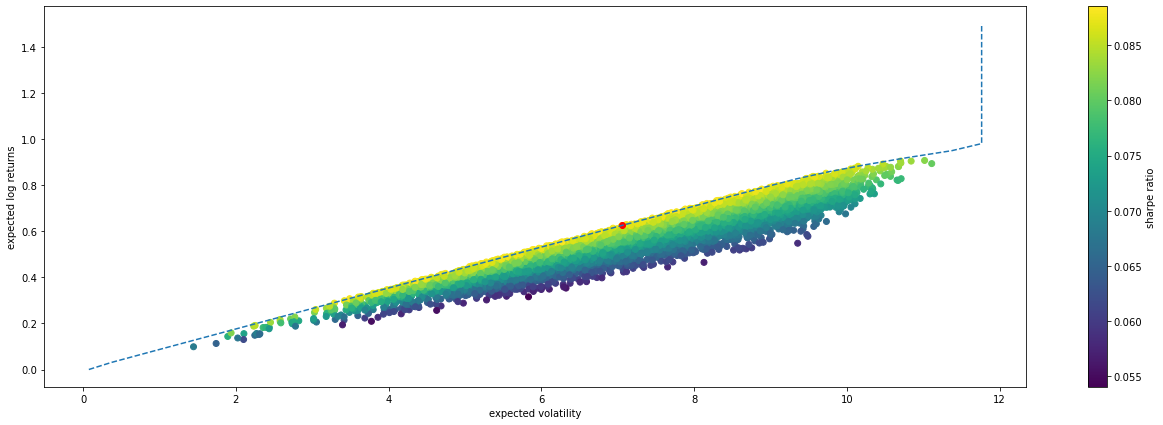

In [261]:
plt.figure(figsize=(22,7))
plt.scatter(expectedVolatility,expectedReturn,c=sharpeRatio)
plt.xlabel('expected volatility')
plt.ylabel('expected log returns')
plt.colorbar(label='sharpe ratio')
plt.scatter(expectedVolatility[maxIndex],expectedReturn[maxIndex],c='red')
plt.plot(volatility_opt,returns, '--')
plt.show()